In [98]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

1) Qual seria sua estratégia para criar uma base de dados para treinamento, teste e validação? Escreva as proporções e justifique cada uma delas.

2) Explique qual é a diferença entre variável categórica e numérica. Analisando o conteúdo do arquivo vendas_linha_petshop_2020_2024.csv, quais variáveis podem ser consideradas numéricas e quais podem ser consideradas categóricas?

3) Analisando os dados do arquivo, qual a importância do código do pedido dentro de qualquer análise preditiva que você venha a fazer com esses dados?

4) A partir dos dados desse arquivo, identifique quantos registros foram identificados como outliers. Descreva qual foi a estratégia utilizada para identificar esses registros.

5) Dado que existem outliers identificados, qual seria a melhor estratégia para tratá-los?

In [80]:
path = r'Asset_PBL_Cap 01_2o_Ano_Fase_5/1o_2o_Desafio/vendas_linha_petshop_2020_2024.csv'

In [81]:
df = pd.read_csv(path,encoding='latin1',sep=';', decimal='.')
display(df.head(5))

/tmp/ipykernel_12643/1531796718.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,encoding='latin1',sep=';', decimal='.')


,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,50284,Norte,Biscoito True Champion 300g,"24,64",2,"49,28",12/03/2020,Acre,Cartão Crédito,Rapid Pink,Carlos,"1,76","26,4",Alimentação
1,50285,Norte,Biscoito True Champion 300g,"23,52",2,"47,04",10/04/2020,Amapá,Cartão Crédito,Rapid Pink,Maria Linda,"1,68","25,2",Alimentação
2,50286,Norte,Biscoito True Champion 300g,"24,64",4,"98,56",07/08/2020,Pará,Dinheiro,Rapid Pink,Julia,"3,52","52,8",Alimentação
3,50287,Norte,Biscoito True Champion 300g,"21,28",4,"85,12",10/01/2020,Rondônia,Pix,Rapid Pink,Yuri,"3,04","45,6",Alimentação
4,50288,Norte,Biscoito True Champion 300g,"24,64",,"49,28",11/04/2020,Tocantins,Cartão Crédito,Rapid Pink,Dolores,"1,76","26,4",Alimentação


In [82]:
df.shape

(250059, 14)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250059 entries, 0 to 250058
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   cod_pedido           250059 non-null  int64 
 1   regiao_pais          250059 non-null  object
 2   produto              250059 non-null  object
 3   valor                250059 non-null  object
 4   quantidade           249727 non-null  object
 5   valor_total_bruto    250059 non-null  object
 6   data                 250059 non-null  object
 7   estado               250059 non-null  object
 8   formapagto           250059 non-null  object
 9   centro_distribuicao  250059 non-null  object
 10  responsavelpedido    250059 non-null  object
 11  valor_comissao       250059 non-null  object
 12  lucro_liquido        250059 non-null  object
 13  categoriaprod        250059 non-null  object
dtypes: int64(1), object(13)
memory usage: 26.7+ MB


In [84]:
cols_valor = {'valor', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido'}
cols_qtd   = {'quantidade'}

for c in df.columns:

    if c in cols_valor:
        s = (df[c].astype(str).str.strip()
       
             .str.extract(r'(\d{1,3}(?:[.,]\d{3})*(?:[.,]\d+)?|\d+(?:[.,]\d+)?)')[0]
           
             .str.replace(r'(?<=\d)[.](?=\d{3}(?:\D|$))', '', regex=True)
             .str.replace(r'(?<=\d),(?=\d{3}(?:\D|$))', '', regex=True)

             .str.replace(',', '.', regex=False)
        )
        df[c] = pd.to_numeric(s, errors='coerce') 

    if c in cols_qtd:
        s = (df[c].astype(str).str.strip()
             .replace('', np.nan)
        
             .str.extract(r'(\d{1,3}(?:[.,]\d{3})*|\d+(?:[.,]\d+)?)')[0]
             .str.replace(r'[.,](?=\d{3}(?:\D|$))', '', regex=True)  
             .str.replace(',', '.', regex=False)
        )
     
        df[c] = pd.to_numeric(s, errors='coerce').round().astype('Int64')

In [85]:
display(df.head(5))

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,50284,Norte,Biscoito True Champion 300g,24.64,2,49.28,12/03/2020,Acre,Cartão Crédito,Rapid Pink,Carlos,1.76,26.4,Alimentação
1,50285,Norte,Biscoito True Champion 300g,23.52,2,47.04,10/04/2020,Amapá,Cartão Crédito,Rapid Pink,Maria Linda,1.68,25.2,Alimentação
2,50286,Norte,Biscoito True Champion 300g,24.64,4,98.56,07/08/2020,Pará,Dinheiro,Rapid Pink,Julia,3.52,52.8,Alimentação
3,50287,Norte,Biscoito True Champion 300g,21.28,4,85.12,10/01/2020,Rondônia,Pix,Rapid Pink,Yuri,3.04,45.6,Alimentação
4,50288,Norte,Biscoito True Champion 300g,24.64,<NA>,49.28,11/04/2020,Tocantins,Cartão Crédito,Rapid Pink,Dolores,1.76,26.4,Alimentação


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250059 entries, 0 to 250058
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cod_pedido           250059 non-null  int64  
 1   regiao_pais          250059 non-null  object 
 2   produto              250059 non-null  object 
 3   valor                250058 non-null  float64
 4   quantidade           249560 non-null  Int64  
 5   valor_total_bruto    250039 non-null  float64
 6   data                 250059 non-null  object 
 7   estado               250059 non-null  object 
 8   formapagto           250059 non-null  object 
 9   centro_distribuicao  250059 non-null  object 
 10  responsavelpedido    250059 non-null  object 
 11  valor_comissao       250038 non-null  float64
 12  lucro_liquido        250038 non-null  float64
 13  categoriaprod        250059 non-null  object 
dtypes: Int64(1), float64(4), int64(1), object(8)
memory usage: 26.9+ MB


In [87]:
df = df.dropna(how='any')

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
q = df[numeric_cols].quantile([0.25, 0.75])
Q1 = q.loc[0.25]
Q3 = q.loc[0.75]
IQR = Q3 - Q1

# fator do "whisker"
# Decidimos por alterar o fator para reduziar ainda mais os outliers, pegando portanto outliers mais extremos.
k = 3.00

limite_inferior= Q1 - k * IQR
limite_superior = Q3 + k * IQR

In [89]:
outlier_bool = (df[numeric_cols] < limite_inferior) | (df[numeric_cols] > limite_superior)
df_outliers = df[outlier_bool.any(axis=1)].copy()

In [90]:
df_IQR = pd.DataFrame({
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR,
    'LowerBound': limite_inferior,
    'UpperBound': limite_superior,
    'OutlierCount': outlier_bool.sum(),
    'OutlierPct': (outlier_bool.sum() / df[numeric_cols].notna().sum() * 100).round(2)}).sort_values('OutlierPct', ascending=False)
display(df_IQR)

,Q1,Q3,IQR,LowerBound,UpperBound,OutlierCount,OutlierPct
valor_comissao,0.78,4.36,3.58,-9.96,15.1,24702,9.9
valor,24.0,74.0,50.0,-126.0,224.0,22108,8.86
valor_total_bruto,39.0,132.0,93.0,-240.0,411.0,21585,8.65
lucro_liquido,18.0,77.7,59.7,-161.1,256.8,17661,7.08
quantidade,1.0,3.0,2.0,-5.0,9.0,4675,1.87


In [91]:
df_outliers.shape[0]

36052

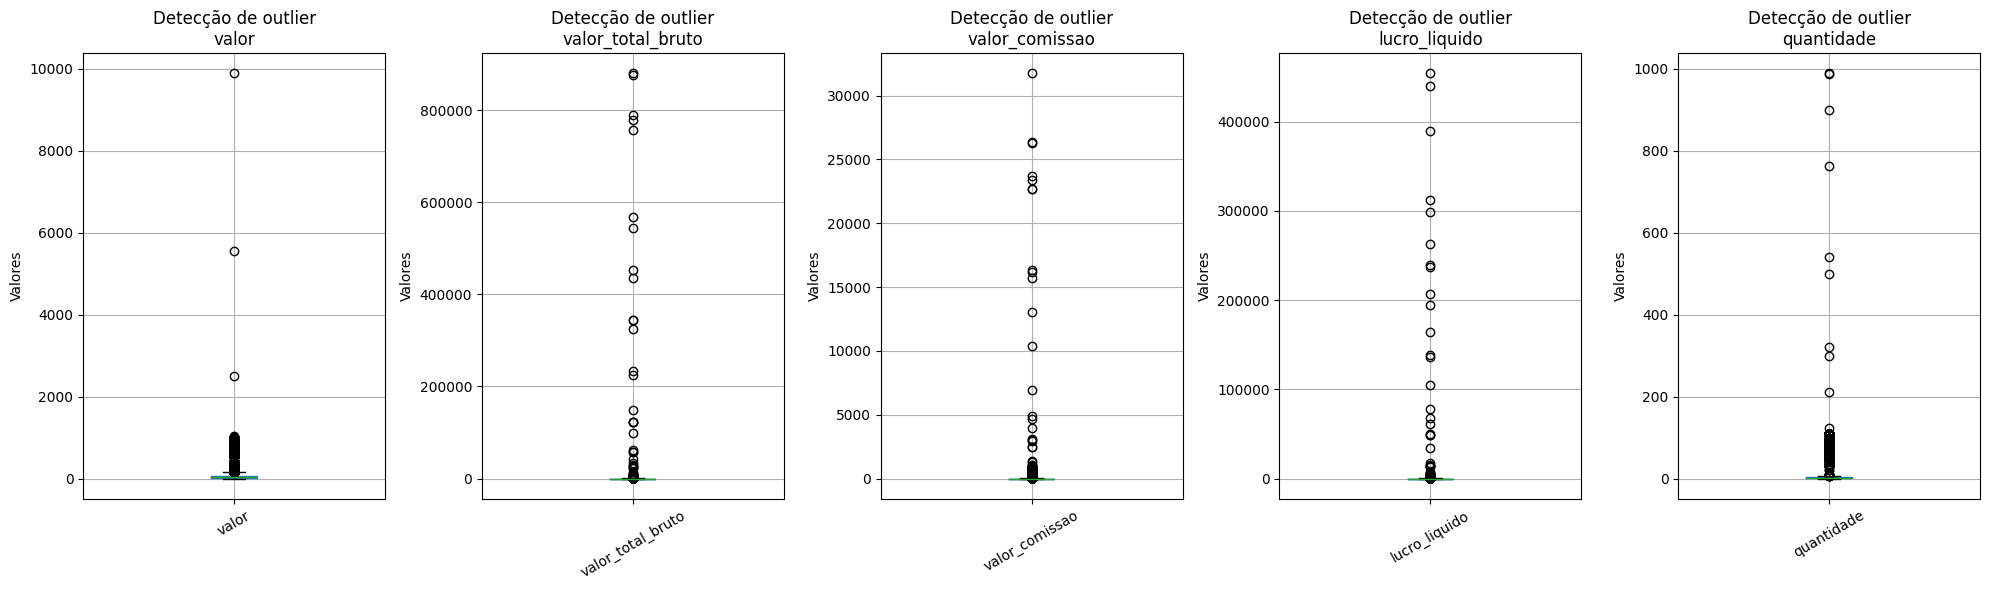

In [92]:
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(4*len(numeric_cols), 6))

if len(numeric_cols) == 1:
    axes = [axes]

for ax, c in zip(axes, numeric_cols):
    df.boxplot(column=c, ax=ax)
    ax.set_title(f'Detecção de outlier\n{c}')
    ax.set_ylabel('Valores')
    ax.set_xticklabels([c], rotation=30)

plt.tight_layout()
plt.show()

In [93]:
display(df_outliers)

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
80,50364,Sudeste,Penas Gatito,20.16,33,665.28,21/02/2020,São Paulo,Pix,Papa Léguas,Miriam,19.80,356.40,Brinquedo
145,50429,Centro Oeste,Roupa para Cão Billaboard,50.40,32,161.00,04/10/2020,Mato Grosso,Boleto Bancário,Grãos Blue,Andressa,37.12,844.80,Acessório
174,50458,Nordeste,Vitamina E Granulado BigForce,77.28,33,255.00,23/02/2020,Bahia,Cartão Crédito,Gold Beach,Sonia,93.72,110.00,Medicamento
187,50471,Norte,Antipulgas e Carrapatos MSD Bravecto para Pet ...,299.04,2,598.08,28/05/2020,Acre,Pix,Rapid Pink,Carlos,23.12,300.30,Medicamento
188,50472,Norte,Antipulgas e Carrapatos MSD Bravecto para Pet ...,316.96,34,107.00,22/12/2020,Amapá,Cartão Crédito,Rapid Pink,Maria Linda,395.76,546.00,Medicamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250025,275362,Nordeste,Cama Coração Coroa Pet Nest Almofada Lavável,86.00,6,518.00,28/02/2024,Pernambuco,Cartão Débito,Gold Beach,Claudio,25.92,311.04,Acessório
250026,275363,Sudeste,Cama Coração Coroa Pet Nest Almofada Lavável,89.00,4,357.00,13/02/2024,Piauí,Cartão Crédito,Gold Beach,Cristian,17.86,214.27,Acessório
250027,275364,Sudeste,Cama Coração Coroa Pet Nest Almofada Lavável,80.00,6,478.00,19/01/2024,São Paulo,Pix,Papa Léguas,Miriam,23.90,286.85,Acessório
250031,275368,Sul,Cama Coração Coroa Pet Nest Almofada Lavável,89.00,5,446.00,21/03/2024,Paraná,Boleto Bancário,Tree True,Beatriz,22.32,267.84,Acessório


In [94]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36052 entries, 80 to 250033
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_pedido           36052 non-null  int64  
 1   regiao_pais          36052 non-null  object 
 2   produto              36052 non-null  object 
 3   valor                36052 non-null  float64
 4   quantidade           36052 non-null  Int64  
 5   valor_total_bruto    36052 non-null  float64
 6   data                 36052 non-null  object 
 7   estado               36052 non-null  object 
 8   formapagto           36052 non-null  object 
 9   centro_distribuicao  36052 non-null  object 
 10  responsavelpedido    36052 non-null  object 
 11  valor_comissao       36052 non-null  float64
 12  lucro_liquido        36052 non-null  float64
 13  categoriaprod        36052 non-null  object 
dtypes: Int64(1), float64(4), int64(1), object(8)
memory usage: 4.2+ MB


### Tratando outliers

In [97]:
# Tratando outliers 
df[numeric_cols] = df[numeric_cols].clip(lower=limite_inferior, upper=limite_superior, axis=1)
df.shape[0]

249558

### Predicao com regressao linear

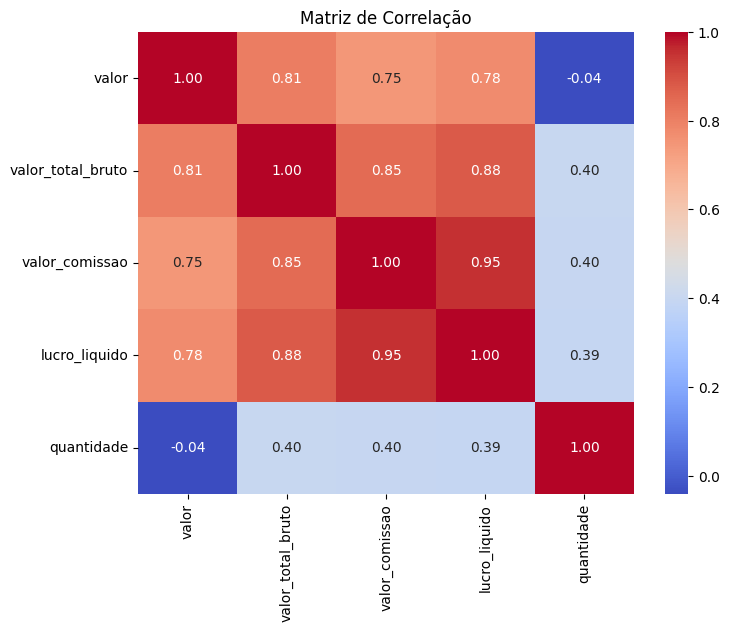

In [99]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()